# Data Exploration & K-means 

In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import random

random.seed(10)

In [2]:
df = pd.read_csv('processed_response.zip')

In [3]:
df.head()

,Polls ID,Assessment reports Student ID,Poll Responses Response,Assessment reports Hashtag,Assessment reports Score,time_stamp,tokenized_responses,stemmed_responses,clean_responses,string,LOs/ HCs,College,Course
0,12522.0,41.0,The strengths of Plato's approach is his const...,#objectivemorality,2.0,1,"['The', 'strengths', 'of', ""Plato's"", 'approac...","['the', 'strength', 'of', 'plato', 'approach',...","['strength', 'plato', 'approach', 'construct',...",strength plato approach construct whole framew...,objmorality,AH,AH111
1,12522.0,335.0,In the breakout we discussed if outside the ca...,#objectivemorality,3.0,1,"['In', 'the', 'breakout', 'we', 'discussed', '...","['in', 'the', 'breakout', 'we', 'discuss', 'if...","['breakout', 'discuss', 'outsid', 'cave', 'mig...",breakout discuss outsid cave might bigger cave...,objmorality,AH,AH111
2,12522.0,318.0,Back to cmmon confusion time: the section 'und...,#objectivemorality,2.0,1,"['Back', 'to', 'cmmon', 'confusion', 'time', '...","['back', 'to', 'cmmon', 'confus', 'time', 'the...","['back', 'cmmon', 'confus', 'time', 'section',...",back cmmon confus time section understand inte...,objmorality,AH,AH111
3,12522.0,315.0,Most difficult weakness is that his position w...,#objectivemorality,2.0,1,"['Most', 'difficult', 'weakness', 'is', 'that'...","['most', 'difficult', 'weak', 'is', 'that', 'h...","['difficult', 'weak', 'posit', 'understand', '...",difficult weak posit understand testabl like i...,objmorality,AH,AH111
4,12522.0,297.0,I'm still trying to understand the significanc...,#objectivemorality,2.0,1,"[""I'm"", 'still', 'trying', 'to', 'understand',...","[""i'm"", 'still', 'tri', 'to', 'understand', 't...","[""i'm"", 'still', 'tri', 'understand', 'signifi...",i'm still tri understand signific cave analog ...,objmorality,AH,AH111


In [4]:
df['string'] = df['string'].values.astype('U')

# Transform dataframe into tfidf 

Key points
- Tf-idf computes weights of the words (how relevant they are in the document)
- The higher the TF-IDF score, the rare or unique the term is, and vice versa
- TF and IDF are calculated in different ways (either by ranking frequency values, or by dividing the words frequency overall by the number of words given in the dictionary)

Formula

- Term Frequency (TF): 
  - Calculate the term frequency 
  - tf(t,d) = count of t in d / number of words in d
- Inverse Document Frequency(IDF)
  - Weigh down the frequent terms may appear a lot of times but have little importance
  - idf(t) = log(N/(df + 1))
- Calculation: TF is multiplied by IDF

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vector = TfidfVectorizer()
tfidf_matrix = tfidf_vector.fit_transform(df['string'])
tfidf_matrix

<181941x79400 sparse matrix of type '<class 'numpy.float64'>'
	with 6018555 stored elements in Compressed Sparse Row format>

In [6]:
#Explore td-idf for one doc: print words & tf-idf scores 
feature_names = tfidf_vector.get_feature_names()
doc = 3 #random doc 
feature_index = tfidf_matrix[doc,:].nonzero()[1] #Return the indices of the elements that are non-zero.
tfidf_scores = zip(feature_index, [tfidf_matrix[doc, x] for x in feature_index])
for w, s in [(feature_names[i], s) for (i, s) in tfidf_scores]:
  print(w, s)

get 0.1602432886945829
way 0.14154666427634024
ani 0.18754112365767017
whether 0.1909802791293325
decid 0.22724769256321592
lot 0.1967549100540339
quit 0.2530798913029075
struggl 0.2884601285317333
peopl 0.13840463662592684
incomprehens 0.451983870307689
like 0.13508086186616905
testabl 0.27084504953544314
posit 0.1880356167579713
difficult 0.23321560468563032
understand 0.15017855307918143
cave 0.3964584008260598
weak 0.24596725240200004


/Users/swimmingcircle/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


We explore words and their tf-idf scores for a random poll response in our dataset. 

# Visualized by wordcloud

## Visualize bags of words

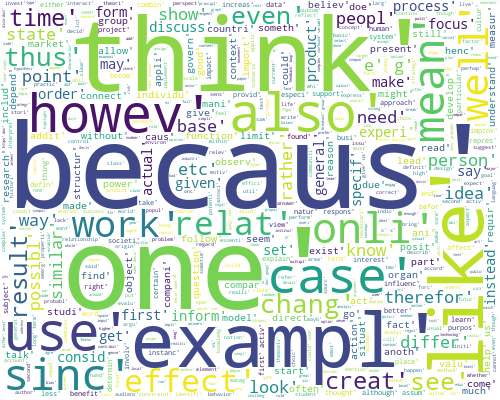

<Figure size 2880x2160 with 0 Axes>

In [7]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(df['clean_responses'])

plt.figure(figsize=(40, 30))
# Create a WordCloud object
wordcloud = WordCloud(width = 500, height = 400, background_color="white", max_words=5000)
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

## Visualize tf-idf

We visualize the word cloud for tf-idf matrix as well, since it takes a long time to run, we slice the matrix that remains around 20% (15000/total # of cols) of the information. 

In [8]:
tfidf_matrix

<181941x79400 sparse matrix of type '<class 'numpy.float64'>'
	with 6018555 stored elements in Compressed Sparse Row format>

In [9]:
response = tfidf_matrix[:, :15000] #slice the matrix 
df_tfidf_sklearn = pd.DataFrame(response.toarray(),columns= tfidf_vector.get_feature_names()[:15000])
df_tfidf_sklearn.head()

,__,___,____,_____,______,_______,________,__________,____________,_____________,...,conjunst,conjunt,conjur,conjvey,conlad,conland,conlcud,conlcus,conley,conlfict
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
#some up all frequency
tf_idf_counter = df_tfidf_sklearn.T.sum(axis=1)

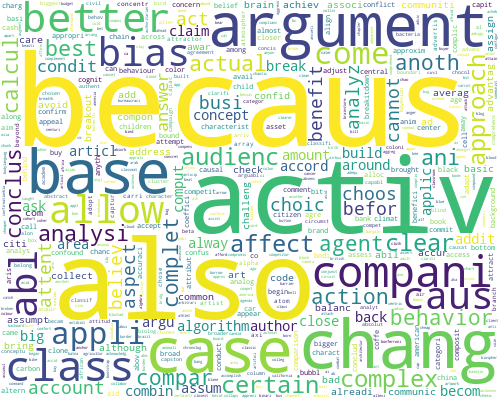

In [11]:
wordcloud = WordCloud(width = 500, height = 400, background_color="white", max_words=5000)
wordcloud.generate_from_frequencies(tf_idf_counter)
wordcloud.to_image()

From the word clouds, we layout the common words for bags of words and 
- Bags of words: think, one, because, also, however, like, example, use, work, only, need, know, mean, relate, use, effect. 
- Tf-idf: because, also, change, base, case, active, companies, arguement, affect, class, apply,complex, allow, better, bias.  
  
We obseverve that though the most common words for both bags of words and tf-idf only provide us words the appear freuqnently, tf-idf gives us more useful information. 

## Cluster by K means

### 5 clusters

In [12]:
from sklearn.cluster import KMeans

num_clusters = 5

km = KMeans(n_clusters=num_clusters)

%time km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

df['cluster'] = np.array(clusters)
terms = tfidf_vector.get_feature_names_out()

CPU times: user 4min 4s, sys: 8.96 s, total: 4min 13s
Wall time: 38.2 s


In [13]:
print("Top terms per cluster:")
print()
#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1] #sort in decending order 

for i in range(num_clusters):
    print("Cluster %d words:" % i, end='')
    
    for ind in order_centroids[i, :15]: # with 15 words per cluster
        print(' %s' % terms[ind],end=',')
    print() #add whitespace
    
print()
print()

Top terms per cluster:

Cluster 0 words: data, variabl, model, use, sampl, would, valu, distribut, probabl, test, hypothesi, observ, studi, mean, differ,
Cluster 1 words: compani, market, product, custom, risk, busi, com, countri, https, invest, cost, price, economi, googl, growth,
Cluster 2 words: poll, complet, student, present, faazillexzvnfbceqmeprnivsrzaadmewqcnu, fabian, fabianokafor, fabiola, fabl, fabric, fabul, fac, faabi, facad, facbook,
Cluster 3 words: would, use, becaus, one, peopl, think, make, differ, also, exampl, like, could, argument, way, time,
Cluster 4 words: problem, system, level, solut, emerg, solv, agent, differ, complex, interact, individu, properti, use, analysi, understand,




/Users/swimmingcircle/Library/Python/3.9/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Assessment Score Count by Cluster')

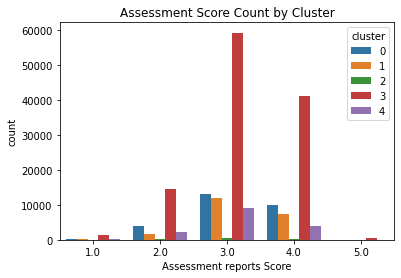

In [14]:
sns.countplot('Assessment reports Score', hue = 'cluster', data = df)
plt.title('Assessment Score Count by Cluster')

Text(0.5, 1.0, 'Normalized Assessment Score Count by Cluster')

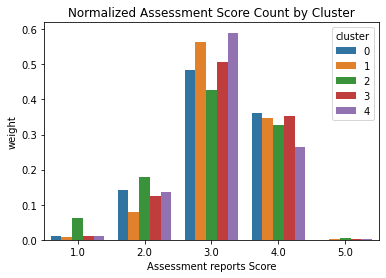

In [15]:
# Normalize the score distribution per cluster 
norm_df = df["Assessment reports Score"].groupby(df["cluster"]).value_counts().rename('count').reset_index()
norm_df = norm_df.assign(weight=norm_df['count']/norm_df.groupby('cluster')['count'].transform('sum'))

sns.barplot(x="Assessment reports Score", y="weight", hue = 'cluster', data=norm_df)
plt.title('Normalized Assessment Score Count by Cluster')

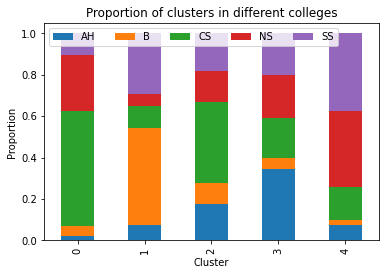

In [16]:
# College distribution per cluster
cross_tab_prop = pd.crosstab(index=df['cluster'],
                             columns=df['College'],
                             normalize="index")
cross_tab_prop


cross_tab_prop.plot(kind='bar', 
                    stacked=True)

plt.legend(loc="upper left", ncol = 5)
plt.xlabel("Cluster")
plt.ylabel("Proportion")
plt.title("Proportion of clusters in different colleges")
plt.show()


### 10 clusters

In [17]:
km_10 = KMeans(n_clusters=10)

%time km_10.fit(tfidf_matrix)

clusters10 = km_10.labels_.tolist()

df['cluster10'] = np.array(clusters10)
terms10 = tfidf_vector.get_feature_names_out()

CPU times: user 5min 32s, sys: 11.3 s, total: 5min 44s
Wall time: 52.5 s


In [18]:
print("Top terms per cluster:")
print()
#sort cluster centers by proximity to centroid
order_centroids = km_10.cluster_centers_.argsort()[:, ::-1] 

for i in range(10):
    print("Cluster %d words:" % i, end='')
    
    for ind in order_centroids[i, :15]: #replace 6 with n words per cluster
        print(' %s' % terms10[ind],end=',')
    print() #add whitespace
    
print()
print()

Top terms per cluster:

Cluster 0 words: compani, market, product, custom, risk, busi, countri, invest, cost, economi, price, would, growth, financi, increas,
Cluster 1 words: doc, https, com, googl, edit, document, usp, share, kgi, edu, minerva, spreadsheet, drive, colab, gid,
Cluster 2 words: system, level, emerg, agent, interact, properti, individu, complex, network, differ, predict, behavior, analysi, understand, social,
Cluster 3 words: data, variabl, model, hypothesi, studi, test, observ, use, would, differ, predict, control, treatment, regress, one,
Cluster 4 words: peopl, think, use, one, would, becaus, differ, make, way, like, also, exampl, understand, could, person,
Cluster 5 words: would, time, use, function, valu, becaus, number, one, chang, node, vector, differ, get, tree, first,
Cluster 6 words: argument, thesi, sentenc, evid, induct, logic, premis, deduct, conclus, true, statement, use, truth, claim, clone,
Cluster 7 words: poll, complet, student, present, faazillexzvnfb

/Users/swimmingcircle/Library/Python/3.9/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Assessment Score Count by Cluster')

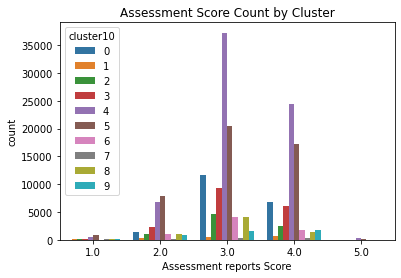

In [19]:
sns.countplot('Assessment reports Score', hue = 'cluster10', data = df)
plt.title('Assessment Score Count by Cluster')

Text(0.5, 1.0, 'Normalized Assessment Score Count by Cluster')

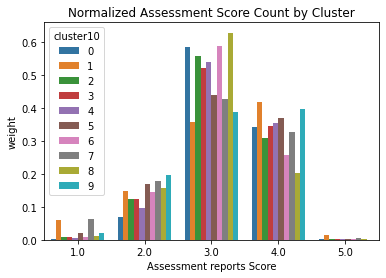

In [20]:
norm_df10 = df["Assessment reports Score"].groupby(df["cluster10"]).value_counts().rename('count').reset_index()
norm_df10 = norm_df10.assign(weight=norm_df10['count']/norm_df10.groupby('cluster10')['count'].transform('sum'))

sns.barplot(x="Assessment reports Score", y="weight", hue = 'cluster10', data=norm_df10)
plt.title('Normalized Assessment Score Count by Cluster')

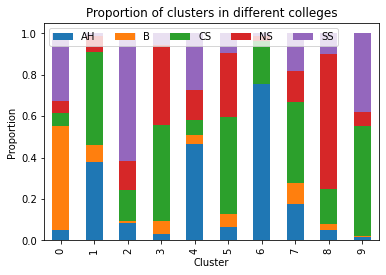

In [21]:
cross_tab_prop = pd.crosstab(index=df['cluster10'],
                             columns=df['College'],
                             normalize="index")
cross_tab_prop


cross_tab_prop.plot(kind='bar', 
                    stacked=True)

plt.legend(loc="upper left", ncol = 5)
plt.xlabel("Cluster")
plt.ylabel("Proportion")
plt.title("Proportion of clusters in different colleges")
plt.show()


# Select the best number of clusters

/Users/swimmingcircle/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/swimmingcircle/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/swimmingcircle/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/

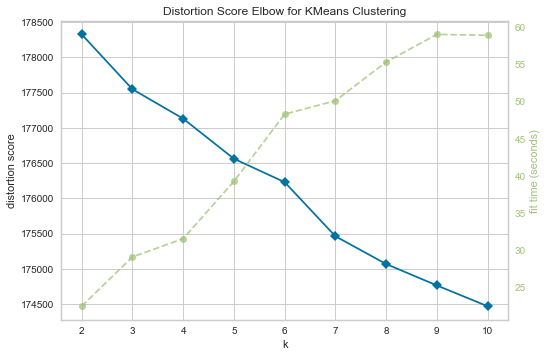

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [25]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

visualizer = KElbowVisualizer(km, k=(2,11))

visualizer.fit(tfidf_matrix)   
visualizer.show()

We cannot see a clear elbow point here, but it seems that 7 is the best number of clusters.

In [32]:
km_7 = KMeans(n_clusters=7)

%time km_7.fit(tfidf_matrix)

clusters7 = km_7.labels_.tolist()

df['cluster7'] = np.array(clusters7)
terms10 = tfidf_vector.get_feature_names_out()

CPU times: user 5min 52s, sys: 12.3 s, total: 6min 5s
Wall time: 54.7 s


In [33]:
print("Top terms per cluster:")
print()
#sort cluster centers by proximity to centroid
order_centroids = km_7.cluster_centers_.argsort()[:, ::-1] 

for i in range(7):
    print("Cluster %d words:" % i, end='')
    
    for ind in order_centroids[i, :15]: #with 15 words per cluster
        print(' %s' % terms10[ind],end=',')
    print() #add whitespace
    
print()
print()

Top terms per cluster:

Cluster 0 words: problem, solut, solv, constraint, water, use, rightproblem, differ, identifi, state, goal, breakitdown, subproblem, step, one,
Cluster 1 words: poll, complet, student, present, faazillexzvnfbceqmeprnivsrzaadmewqcnu, fabian, fabianokafor, fabiola, fabl, fabric, fabul, fac, faabi, facad, facbook,
Cluster 2 words: peopl, use, one, think, would, becaus, differ, make, exampl, argument, understand, system, also, way, like,
Cluster 3 words: data, variabl, model, hypothesi, studi, observ, use, test, would, predict, differ, control, treatment, one, regress,
Cluster 4 words: doc, https, com, googl, edit, document, usp, share, kgi, edu, minerva, spreadsheet, drive, colab, gid,
Cluster 5 words: compani, market, product, custom, risk, countri, busi, economi, cost, invest, would, price, growth, financi, increas,
Cluster 6 words: would, valu, use, probabl, time, becaus, number, function, mean, distribut, one, sampl, get, first, node,




Text(0.5, 1.0, 'Assessment Score Count by Cluster')

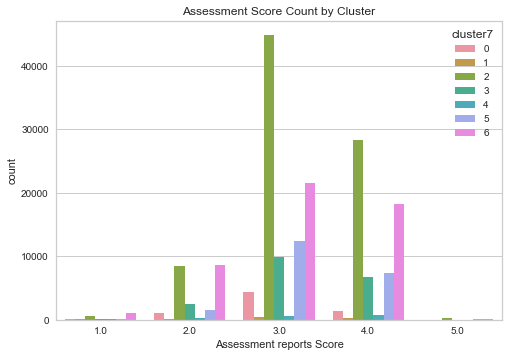

In [36]:
sns.countplot('Assessment reports Score', hue = 'cluster7', data = df)
plt.title('Assessment Score Count by Cluster')

Text(0.5, 1.0, 'Normalized Assessment Score Count by Cluster')

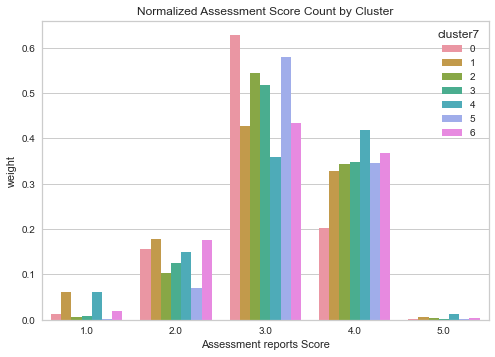

In [37]:
norm_df7 = df["Assessment reports Score"].groupby(df["cluster7"]).value_counts().rename('count').reset_index()
norm_df7 = norm_df7.assign(weight=norm_df7['count']/norm_df7.groupby('cluster7')['count'].transform('sum'))

sns.barplot(x="Assessment reports Score", y="weight", hue = 'cluster7', data=norm_df7)
plt.title('Normalized Assessment Score Count by Cluster')

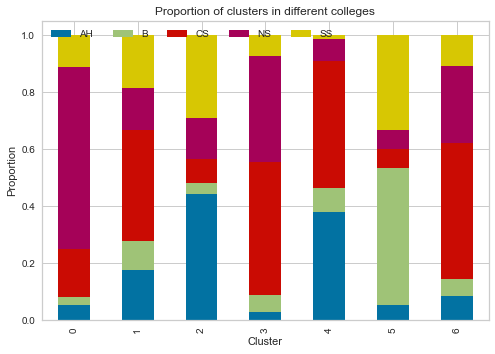

In [38]:
cross_tab_prop = pd.crosstab(index=df['cluster7'],
                             columns=df['College'],
                             normalize="index")
cross_tab_prop


cross_tab_prop.plot(kind='bar', 
                    stacked=True)

plt.legend(loc="upper left", ncol = 5)
plt.xlabel("Cluster")
plt.ylabel("Proportion")
plt.title("Proportion of clusters in different colleges")
plt.show()

# Visualize K-means result 

We use `TruncatedSVD` to decompose `tfidf_matrix`, because the matrix is too fat to plot it directly and `TruncatedSVD` works well with sparse data. We then attempt to plot the clusters with 2 components. 

In [46]:
from sklearn.decomposition import TruncatedSVD

labels_color_map = {
    0: '#20b2aa', 1: '#ff7373', 2: '#ffe4e1', 3: '#005073', 4: '#4d0404', 5: '#1b4b43', 6:'#6c4a3f'}

svd = TruncatedSVD(n_components=2)
reduced_matrix = svd.fit_transform(tfidf_matrix) 
print(reduced_matrix.shape)

(181941, 2)


In [47]:
#slice the matrix even more
rr_matrix = reduced_matrix[:3000,:]

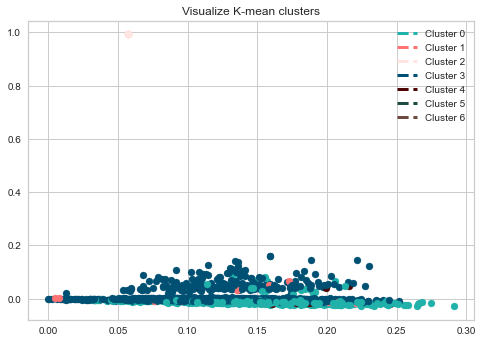

In [48]:
from matplotlib.lines import Line2D

fig, ax = plt.subplots()
lines = [Line2D([0], [0], color=c, linewidth=3, linestyle='--') for c in labels_color_map.values()]
for index, instance in enumerate(rr_matrix):
    pca_comp_1, pca_comp_2 = rr_matrix[index]
    color = labels_color_map[clusters[index]]
    ax.scatter(pca_comp_1, pca_comp_2, c=color)
plt.title('Visualize K-mean clusters')
plt.legend(lines, ['Cluster 0', 'Cluster 1','Cluster 2','Cluster 3','Cluster 4', 'Cluster 5', 'Cluster 6'])
plt.show()

However, since the reduced matrix after `TruncatedSVD` is still too big to plot, we slice it into 3000 data points. Therefore, some clusters are not inlcuded. From the visualization, it seems that the data isn't accurately clustered. However, it can because of over reduced and slicing of it, or 2 components aren't the right numbers of dimensions to visualize it. 